## Crossing barriers with biased gradient and fande.explore

realization of barrier crossings is similar to one described in:

Unsleber, Jan P., Stephanie A. Grimmel, and Markus Reiher. "Chemoton 2.0: Autonomous Exploration of Chemical Reaction Networks." [arXiv preprint arXiv:2202.13011](https://arxiv.org/pdf/2202.13011.pdf) (2022).

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..") 
sys.path.append("../..") 

import ase
import numpy as np
from ase import io

from fande.explore import ForcedCalc, ForcedExplorer
from ase.visualize import view
from ase.build import molecule
from ase import io
from ase.visualize.plot import plot_atoms

import os

import matplotlib.pyplot as plt
from tqdm import tqdm


os.makedirs("data/dump/ase", exist_ok=True)
os.makedirs("data/dump/smiles", exist_ok=True)

fande.models module imported...
FandE-GP imported  
objects of fande.predict module imported...


### Obtaining 2 kinds of transformations with biased gradient

Load the initial structure then initialize the explorer, and run the optimization with biased gradient to get a transformed structure. 

Optimization paths are saved to `data/dump/ase/full_traj.xyz`

Initial structure:


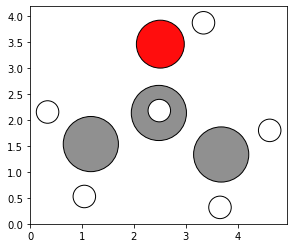

Path during optimization:


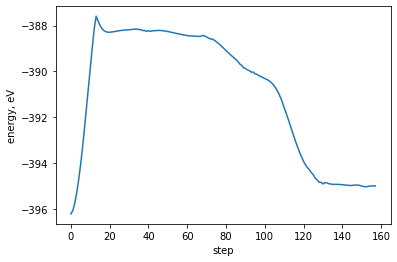

Transformed structure:


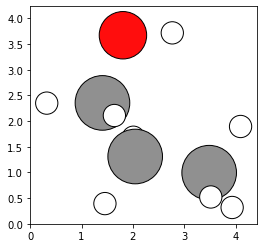

In [3]:
atoms = molecule("C2H6CHOH")

print("Initial structure:")
plot_atoms(atoms, radii=0.7)
plt.show()

# if you want to fix some atoms just apply ASE constraints:
# from ase.constraints import FixAtoms
# c = FixAtoms(indices=[atom.index for atom in atoms if atom.symbol == 'C'])
# atoms.set_constraint(c)

fx = ForcedExplorer(atoms, force=6.0, logfile='data/dump/explore_log.log')
traj1, e_path1, atoms_opt1, energy_opt1, energy_pre_opt1 = fx.single_forced_run(atoms, [[4] , [5] ], 9.0 )

print("Path during optimization:")
plt.plot(e_path1)
plt.xlabel("step")
plt.ylabel("energy, eV")
plt.show()

print("Transformed structure:")
plot_atoms(atoms_opt1, radii=0.7)
plt.show()

now let's get another transformation, in this case seems like an abstraction of H2O happens

Initial structure:


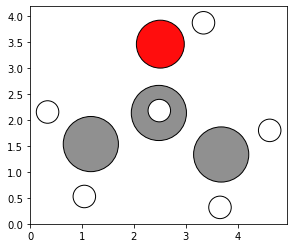

Path during optimization:


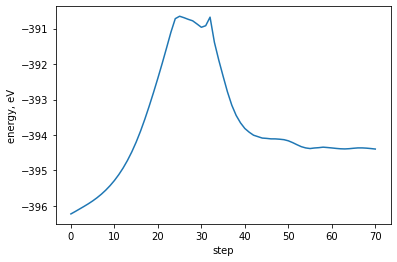

Transformed structure:


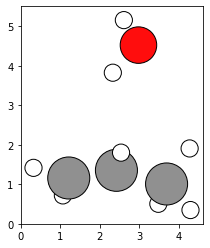

In [4]:
atoms = molecule("C2H6CHOH")

print("Initial structure:")
plot_atoms(atoms, radii=0.7)
plt.show()

# if you want to fix some atoms just apply ASE constraints:
# from ase.constraints import FixAtoms
# c = FixAtoms(indices=[atom.index for atom in atoms if atom.symbol == 'C'])
# atoms.set_constraint(c)

fx = ForcedExplorer(atoms, force=6.0, logfile='data/dump/explore_log.log')
traj2, e_path2, atoms_opt2, energy_opt2, energy_pre_opt2 = fx.single_forced_run(atoms, [[0] , [6] ], 11.5 )


print("Path during optimization:")
plt.plot(e_path2)
plt.xlabel("step")
plt.ylabel("energy, eV")
plt.show()

print("Transformed structure:")
plot_atoms(atoms_opt2, radii=0.7)
plt.show()

## Running transformations in a loop

In [75]:
atoms = molecule("C2H6CHOH")

at1 = np.random.choice( (0,5), size=5)
at2 = np.random.choice( (6,11), size=5)

print("Sets of atoms: ", at1, at2)

long_traj = []
molecules = []
for i in tqdm( range( len(at1)) ):
        for j in range(len(at2) ):
                if i!=j:
                        atoms = molecule("C2H6CHOH")
                        traj, e_path, atoms_opt, energy_opt, energy_pre_opt = fx.single_forced_run(atoms, [ [at1[i] ], [ at2[j] ] ], 12.0 )
                        long_traj = long_traj +traj
                        molecules = molecules + [atoms_opt]
                        # print(energy_opt)
                        # view(traj)


Sets of atoms:  [0 5 5 0 5] [11  6 11 11 11]


100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


getting SMILES strings after the loop

In [76]:
import subprocess

smiles_strings = []

for i, mol in tqdm(enumerate(molecules)):
        io.write("data/dump/smiles/" + str(i) + ".xyz", mol, format="xyz")
        s = subprocess.run (["xyz2mol", "data/dump/smiles/" + str(i) + ".xyz"], capture_output=True, text=True)
        smiles_strings.append(s.stdout)

print(smiles_strings)

20it [00:05,  3.69it/s]

['C=CC.O\n', 'C=CC.O\n', 'C=CC.O\n', 'C=CC.O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n', 'C=CC.O\n', 'C=CC.O\n', 'C=CC.O\n', 'C=CC.O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n', 'CC(C)O\n']
